# Features Exploration

1. User Language
2. Profile Category
3. Profile Cratin Timestamps
4. Is Profile View Customized
5. Username
6. Profile Verification Status

In [32]:
# Imports and set up

#### FOR MAC OSX USERS ####
import matplotlib
matplotlib.use('TkAgg')
import matplotlib.pyplot as plt
##########################

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.impute import KNNImputer
from imblearn.under_sampling import RandomUnderSampler
from sklearn.datasets import make_classification

from utils.missing_values_filler import MissingValuesFiller

/usr/local/Caskroom/miniconda/base/envs/dsp/lib/python3.5/site-packages/matplotlib/__init__.py:1405: UserWarning: 
This call to matplotlib.use() has no effect because the backend has already
been chosen; matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

  warnings.warn(_use_error_msg)


In [33]:
# Load train dataset
raw_df = pd.read_csv("src_data/train.csv")

# User Language

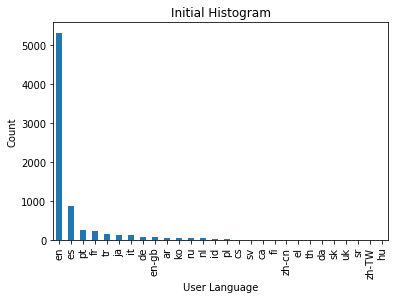

Not english count: 2179


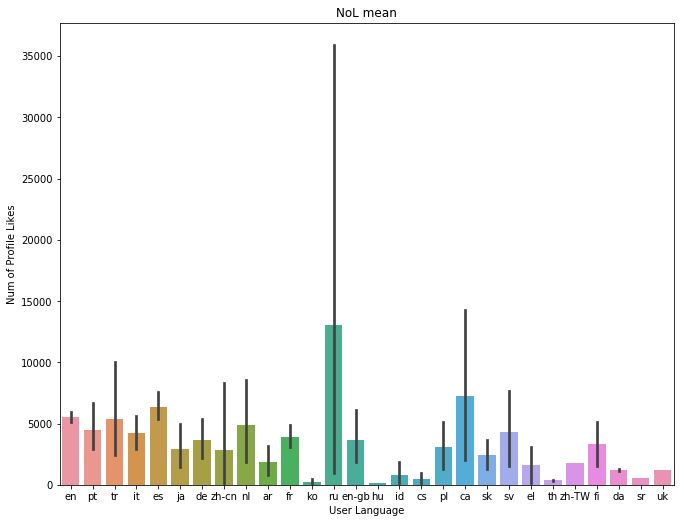

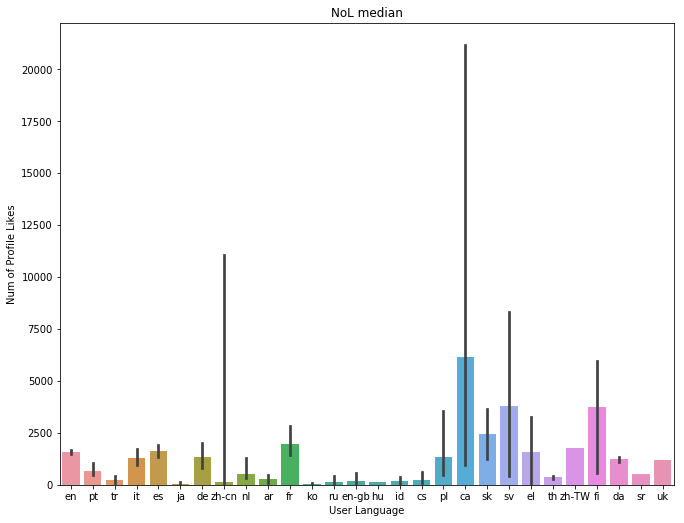

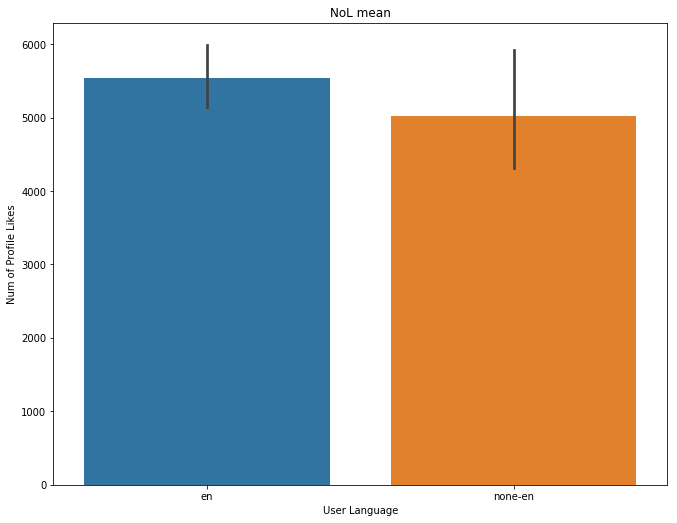

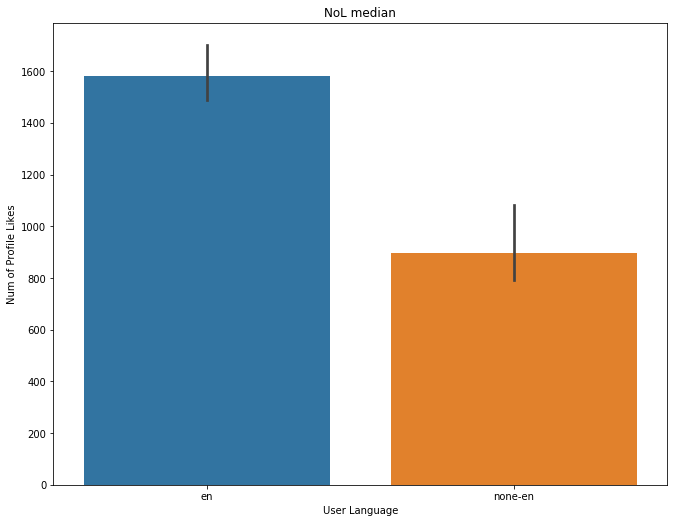

In [43]:
# Histogram

raw_df['User Language'].value_counts().plot(kind='bar')
plt.xlabel('User Language')
plt.ylabel('Count')
plt.title('Initial Histogram')
plt.show()

print("Not english count: {}".format(len(raw_df[raw_df['User Language'] != 'en'])))

# Barplot

fig, ax = plt.subplots()
fig.set_size_inches(11, 8.5)
sns.barplot(x="User Language", y="Num of Profile Likes", data=raw_df, estimator=np.mean).set_title('NoL mean')
plt.show()

fig, ax = plt.subplots()
fig.set_size_inches(11, 8.5)
sns.barplot(x="User Language", y="Num of Profile Likes", data=raw_df, estimator=np.median).set_title('NoL median')
plt.show()

# Separate 'en' and none-'en' records

lang_df = raw_df.copy(deep=True)
lang_df['User Language'] = raw_df['User Language'].apply(lambda val: 'en' if val == 'en' else 'none-en')

fig, ax = plt.subplots()
fig.set_size_inches(11, 8.5)
sns.barplot(x="User Language", y="Num of Profile Likes", data=lang_df, estimator=np.mean).set_title('NoL mean')
plt.show()

fig, ax = plt.subplots()
fig.set_size_inches(11, 8.5)
sns.barplot(x="User Language", y="Num of Profile Likes", data=lang_df, estimator=np.median).set_title('NoL median')
plt.show()

# Profile Category

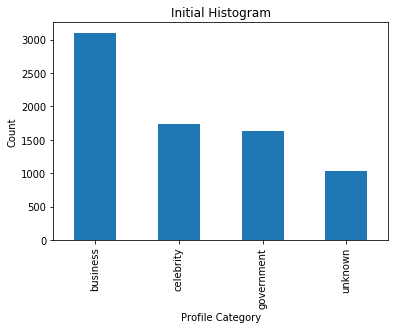

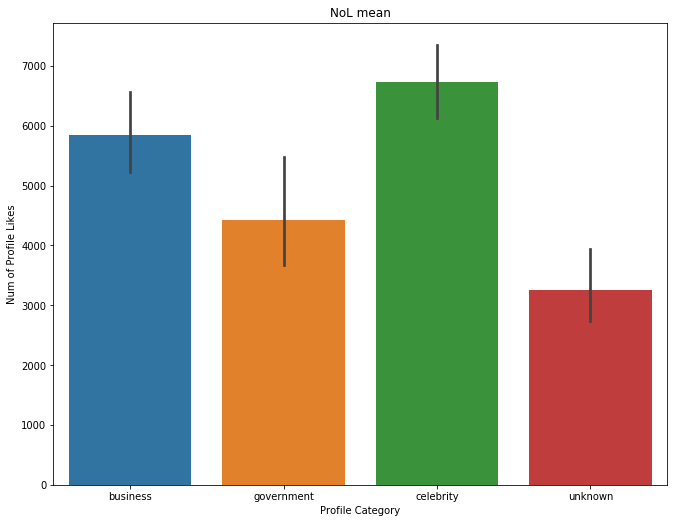

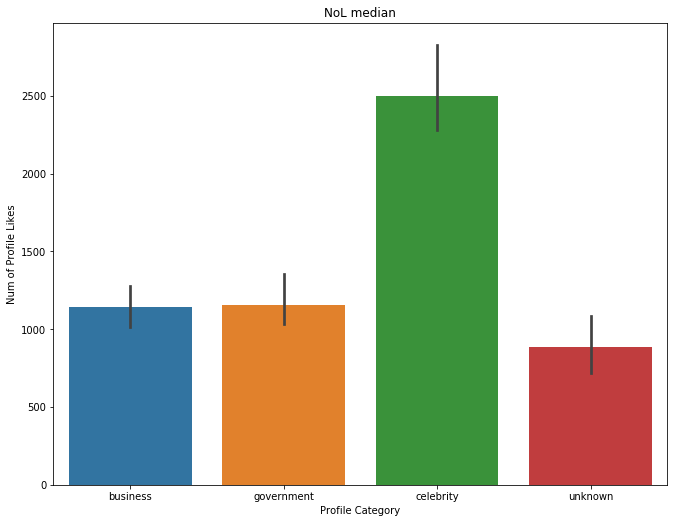

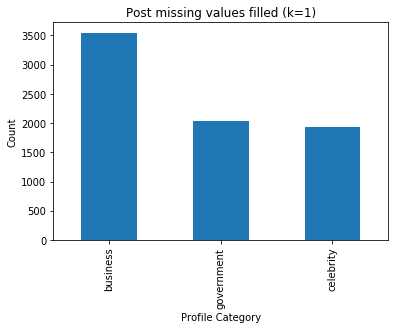

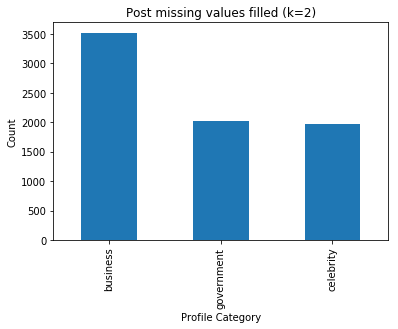

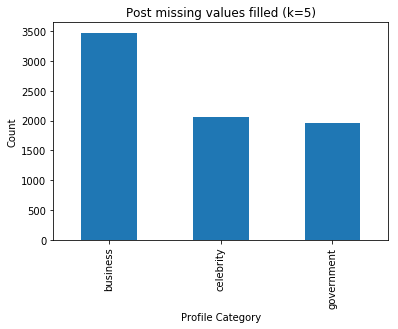

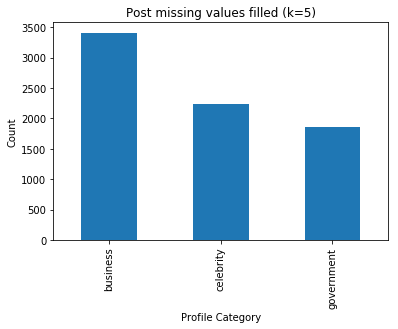

In [39]:
# Clean
profile_df = raw_df.copy(deep=True)
profile_df['Profile Category'] = profile_df['Profile Category'].replace(r'^\s*$', 'unknown', regex=True)

# Histogram

profile_df['Profile Category'].value_counts().plot(kind='bar')
plt.xlabel('Profile Category')
plt.ylabel('Count')
plt.title('Initial Histogram')
plt.show()

# Barplots

fig, ax = plt.subplots()
fig.set_size_inches(11, 8.5)
sns.barplot(x="Profile Category", y="Num of Profile Likes", data=profile_df, estimator=np.mean).set_title('NoL mean')
plt.show()

fig, ax = plt.subplots()
fig.set_size_inches(11, 8.5)
sns.barplot(x="Profile Category", y="Num of Profile Likes", data=profile_df, estimator=np.median).set_title('NoL median')
plt.show()

# Missing values filler
mvf = MissingValuesFiller()

# K = 1
profile_df = raw_df.copy(deep=True)
profile_df['Profile Category'] = profile_df['Profile Category'].replace(r'^\s*$', 'unknown', regex=True)
profile_df = mvf.fill_missing_values(profile_df, 'Profile Category', 'unknown', 'Num of Status Updates', 1)

profile_df['Profile Category'].value_counts().plot(kind='bar')
plt.xlabel('Profile Category')
plt.ylabel('Count')
plt.title('Post missing values filled (k=1)')
plt.show()

# K = 2
profile_df = raw_df.copy(deep=True)
profile_df['Profile Category'] = profile_df['Profile Category'].replace(r'^\s*$', 'unknown', regex=True)
profile_df = mvf.fill_missing_values(profile_df, 'Profile Category', 'unknown', 'Num of Status Updates', 2)

profile_df['Profile Category'].value_counts().plot(kind='bar')
plt.xlabel('Profile Category')
plt.ylabel('Count')
plt.title('Post missing values filled (k=2)')
plt.show()

# K = 5
profile_df = raw_df.copy(deep=True)
profile_df['Profile Category'] = profile_df['Profile Category'].replace(r'^\s*$', 'unknown', regex=True)
profile_df = mvf.fill_missing_values(profile_df, 'Profile Category', 'unknown', 'Num of Status Updates', 5)

profile_df['Profile Category'].value_counts().plot(kind='bar')
plt.xlabel('Profile Category')
plt.ylabel('Count')
plt.title('Post missing values filled (k=5)')
plt.show()

# K = 20
profile_df = raw_df.copy(deep=True)
profile_df['Profile Category'] = profile_df['Profile Category'].replace(r'^\s*$', 'unknown', regex=True)
profile_df = mvf.fill_missing_values(profile_df, 'Profile Category', 'unknown', 'Num of Status Updates', 20)

profile_df['Profile Category'].value_counts().plot(kind='bar')
plt.xlabel('Profile Category')
plt.ylabel('Count')
plt.title('Post missing values filled (k=20)')
plt.show()

# Profile Verification Status

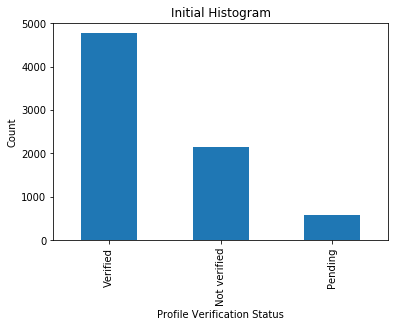

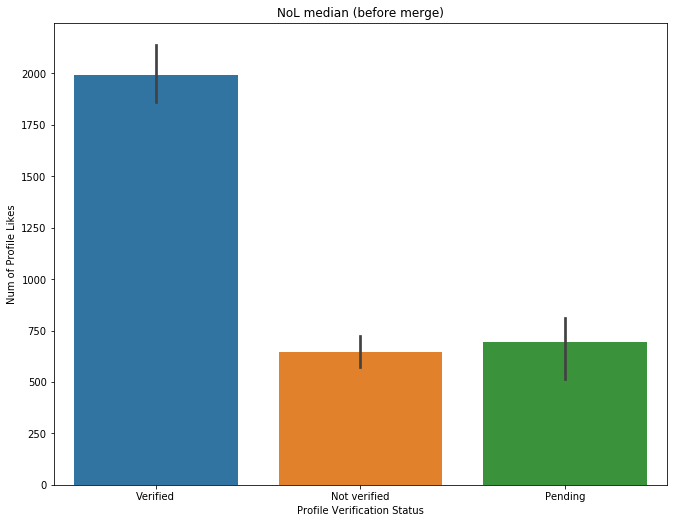

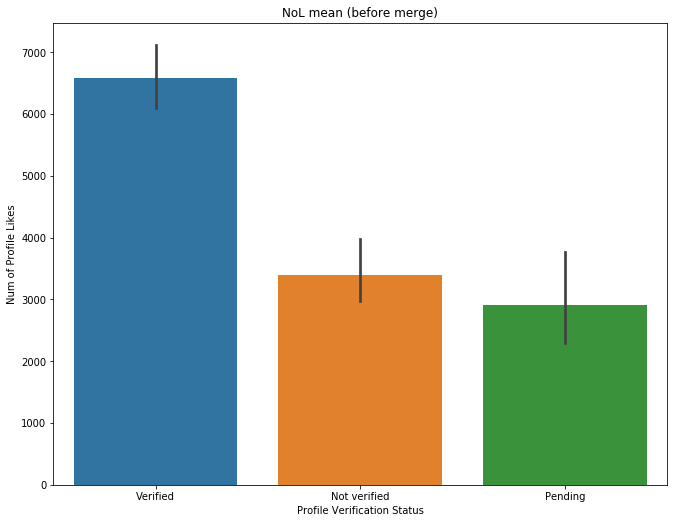

'Pending' is the exact same as 'Not verified' when we want to predict the 'Profile Num of Likes' ...


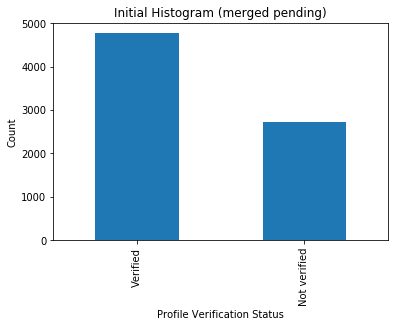

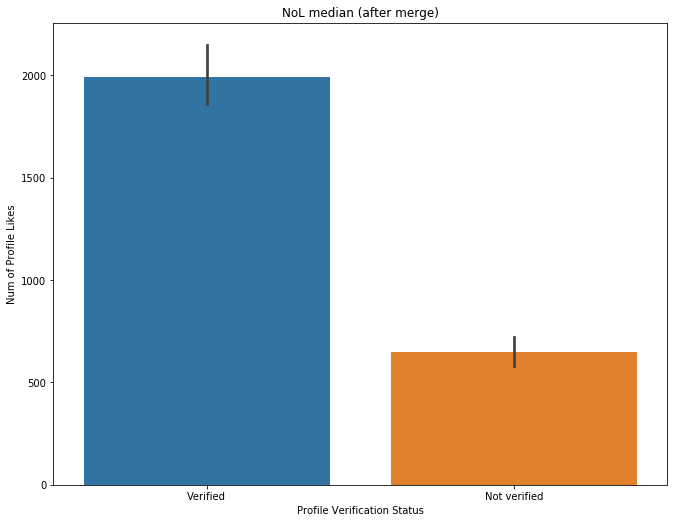

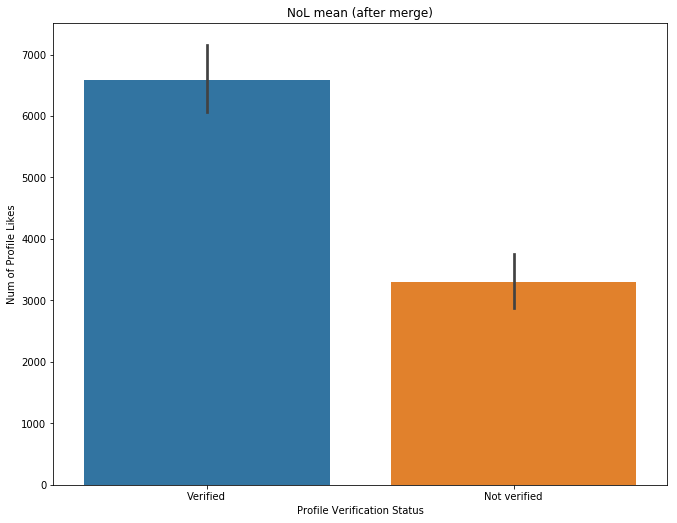

In [46]:
# Load a copy
profile_df = raw_df.copy(deep=True)

# Histogram

profile_df['Profile Verification Status'].value_counts().plot(kind='bar')
plt.xlabel('Profile Verification Status')
plt.ylabel('Count')
plt.title('Initial Histogram')
plt.show()

# Barplot

fig, ax = plt.subplots()
fig.set_size_inches(11, 8.5)
sns.barplot(x="Profile Verification Status", y="Num of Profile Likes", data=profile_df, estimator=np.median).set_title('NoL median (before merge)')
plt.show()

fig, ax = plt.subplots()
fig.set_size_inches(11, 8.5)
sns.barplot(x="Profile Verification Status", y="Num of Profile Likes", data=profile_df, estimator=np.mean).set_title('NoL mean (before merge)')
plt.show()

# Clean pending

print("'Pending' is the exact same as 'Not verified' when we want to predict the 'Profile Num of Likes' ...")
profile_df['Profile Verification Status'] = profile_df['Profile Verification Status'].replace('Pending', 'Not verified', regex=True)

# Histogram

profile_df['Profile Verification Status'].value_counts().plot(kind='bar')
plt.xlabel('Profile Verification Status')
plt.ylabel('Count')
plt.title('Initial Histogram (merged pending)')
plt.show()

# Barplot

fig, ax = plt.subplots()
fig.set_size_inches(11, 8.5)
sns.barplot(x="Profile Verification Status", y="Num of Profile Likes", data=profile_df, estimator=np.median).set_title('NoL median (after merge)')
plt.show()

fig, ax = plt.subplots()
fig.set_size_inches(11, 8.5)
sns.barplot(x="Profile Verification Status", y="Num of Profile Likes", data=profile_df, estimator=np.mean).set_title('NoL mean (after merge)')
plt.show()